<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/RF_Nawungan_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTIMASI ETP DENGAN ALGORITMA RANDOM FOREST**

Data AWS Nawungan
Data Masukan : Kelembaban Udara

In [1]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn. metrics import mean_squared_error, r2_score

In [3]:
#Load data fitur dan data target
df = pd.read_excel('/content/Nawungan_15 Minutes_PM.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()

,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2019-03-23 13:45:00,2019,82,13.75,35.33,98.1,0.6,495.300293,0.012626,1.005232,...,1253.501011,322.091168,38.924002,69,288.429159,1.038345,0.423814,h,0.120000,m
3,2019-03-23 14:00:00,2019,82,14,35.2,98.07,0.6,476.44043,0.012626,1.005232,...,1252.053277,322.091168,37.458473,69,277.162717,0.997786,0.40726,rc day,69.000000,s/m
4,2019-03-23 14:15:00,2019,82,14.25,35.56,98.1,0.8,564.51416,0.012626,1.005232,...,1251.928438,241.568376,44.276054,69,325.377537,1.171359,0.478106,rc night,690.000000,s/m
5,2019-03-23 14:30:00,2019,82,14.5,34.94,98.1,0.9,493.835449,0.012626,1.005232,...,1249.215979,214.727445,38.773533,69,281.796996,1.014469,0.414069,Latitude,-7.964911,degrees
6,2019-03-23 14:45:00,2019,82,14.75,34.51,98.08,0.5,322.08252,0.012626,1.005232,...,1247.027952,386.509401,25.507475,69,188.38674,0.678192,0.276813,Longitude,110.405090,degrees


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92277 entries, 2 to 92278
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         92277 non-null  object 
 1   Year         92277 non-null  object 
 2   DOY          92277 non-null  object 
 3   Time         92277 non-null  object 
 4   T            92277 non-null  object 
 5   RH           92277 non-null  object 
 6   U            92277 non-null  object 
 7   Rs           92277 non-null  object 
 8   Dec          92277 non-null  object 
 9   dr           92277 non-null  object 
 10  t.c.         92277 non-null  object 
 11  angh         92277 non-null  object 
 12  cos θ        92277 non-null  object 
 13  Rs pot       92277 non-null  object 
 14  TRA          92277 non-null  float64
 15  Rb           92277 non-null  object 
 16  es           92277 non-null  object 
 17  e            92277 non-null  object 
 18  VPD          92277 non-null  object 
 19  Rn  

In [5]:
#Code untuk menyatakan data target dan data fitur
target_variable = df['ET']
features_variabel = df['RH']

In [6]:
# Membuat variabel untuk data fitur dan target
X = features_variabel
y = target_variable

#Split data untuk train dan test dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
#Random Forest Model
model = RandomForestRegressor(n_estimators = 150, max_depth = 5)

In [8]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

#Pelatihan model untuk data training
model.fit(X_train_reshaped, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [12]:
#Prediksi pada data training dan test
x_pred = model.predict(X_train_reshaped)
y_pred = model.predict(X_test_reshaped)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse: .2f}")
print(f"R-squared: {r2: .2f}")

Mean Squared Error :  0.07
R-squared:  0.04


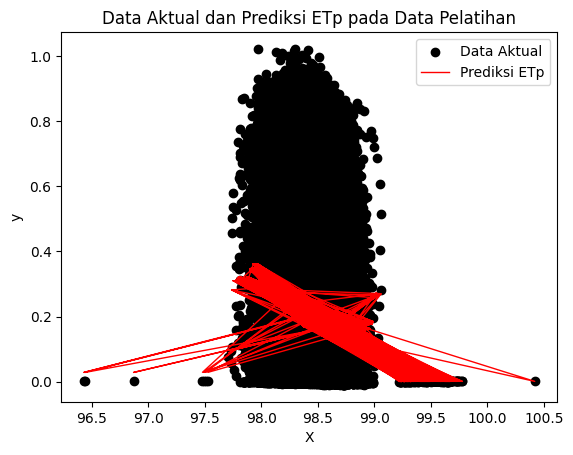

In [13]:
import matplotlib.pyplot as plt
# Plot data aktual dan prediksi pada data pelatihan
plt.scatter(X_train, y_train, color='black', label='Data Aktual')
plt.plot(X_train, x_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.title('Data Aktual dan Prediksi ETp pada Data Pelatihan')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

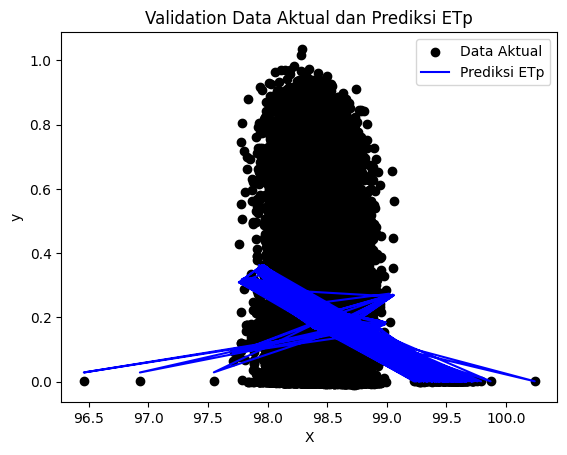

In [14]:
#Plot pada data test
plt.scatter(X_test, y_test, color = 'black', label = 'Data Aktual')
plt.plot(X_test, y_pred, color='blue', label='Prediksi ETp')
plt.title('Validation Data Aktual dan Prediksi ETp')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()